

---

# **회귀 문제 : 보스턴 주택 가격 예측**

---



In [ ]:
import tensorflow as tf #텐서플로 추가
from keras.datasets import boston_housing #데이터 가져오기

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() #보스턴 주택 가격의 테스트 값과 훈련값

57344/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape #학습 데이터 갯수 404개

(404, 13)

In [ ]:
test_data.shape #테스트 데이터 갯수 102개

(102, 13)

In [ ]:
#학습 데이터와 테스트 데이터 정규화 (각 데이터 값 - 데이터 값 평균값) / 데이터 표준편차
data_mean = train_data.mean(axis = 0)
data_std = train_data.std(axis=0)
train_data -= data_mean
train_data /= data_std
test_data -= data_mean
test_data /= data_std

In [ ]:
targets_mean = train_targets.mean(axis = 0)
targets_std = train_targets.std(axis=0)
train_targets -= targets_mean
train_targets /= targets_std
test_targets -= targets_mean
test_targets /= targets_std

In [ ]:
#모델과 레이어 추가
from keras import models
from keras import layers

#모델 구성 은닉층 6개 출력층 1개
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=91, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=78, activation='relu'),
    tf.keras.layers.Dense(units=52, activation='relu'),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=13, activation='relu'),
    tf.keras.layers.Dense(units=1)                                     
])

#학습률 5프로, 손실함수 평균제곱오차
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.05),loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 91)                1274      
_________________________________________________________________
dense_1 (Dense)              (None, 78)                7176      
_________________________________________________________________
dense_2 (Dense)              (None, 52)                4108      
_________________________________________________________________
dense_3 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 13)                351       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [ ]:
#검증 데이터로 25퍼센트 활용 훈련은 100번 진행 5번 동안 손실이 줄어들지 않으면 callbacks 함수를 사용하여 훈련 중단
history = model.fit(train_data, train_targets, epochs=100, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/100
10/10 [==============================] - 0s 15ms/step - loss: 1.4105 - val_loss: 0.9299
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4294 - val_loss: 0.5073
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2391 - val_loss: 0.4592
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2402 - val_loss: 0.2688
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1983 - val_loss: 0.4781
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2094 - val_loss: 0.1879
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1522 - val_loss: 0.2699
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1385 - val_loss: 0.2261
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1329 - val_loss: 0.1728
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0946 - val_loss: 0.1558
Epoch 11

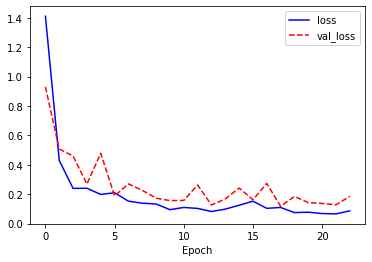

In [ ]:
#훈련과정 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
#모델 평가
model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 0.2470


0.24695049226284027

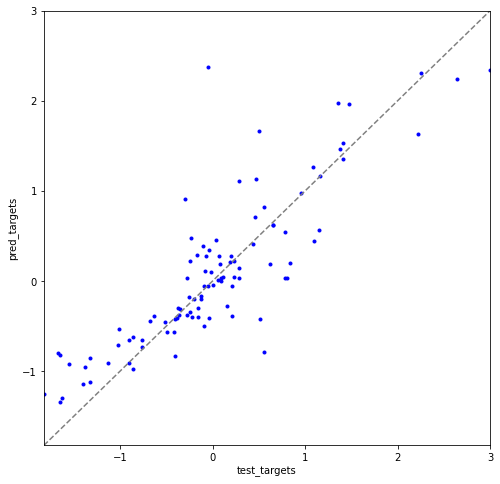

In [ ]:
#예측 결과와 실제 값 비교 시각화
import matplotlib.pyplot as plt

pred_targets = model.predict(test_data)

plt.figure(figsize=(8,8))
plt.plot(test_targets, pred_targets, 'b.')
plt.axis([min(test_targets), max(test_targets), min(test_targets), max(test_targets)])

plt.plot([min(test_targets), max(test_targets)], [min(test_targets), max(test_targets)], ls="--", c=".5")
plt.xlabel('test_targets')
plt.ylabel('pred_targets')

plt.show()



---
# **분류 문제: Iris 붓꽃 분류**

---




In [ ]:
import tensorflow as tf

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

#붓꽃 데이터 가져오기
iris = sns.load_dataset("iris") 

In [ ]:
iris.shape #데이터 150개

(150, 5)

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris['species'].unique() #붓꽃 종류는 3개

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

#iris 내부에 있는 0~4번을 x 4번인 종류를 y로 분류
x = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

#softmax에서 사용 될 수 있도록 y의 글자를 원핫인코딩으로 바꾸어줌
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
y = pd.get_dummies(y1).values

In [ ]:
#학습 데이터와 테스트 데이터로 분류
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [ ]:
from keras import models
from keras import layers

#모델 생성 활성 함수 relu 입력종류 4개 은닉층 3개 출력결과 3개
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')                                     
])

#손실 함수 다중 분류 손실함수
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.05),loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#검증 데이터로 25퍼센트 활용 훈련은 100번 진행 10번 동안 손실이 줄어들지 않으면 callbacks 함수를 사용하여 훈련 중단
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Epoch 1/100
3/3 [==============================] - 0s 52ms/step - loss: 1.9206 - accuracy: 0.4688 - val_loss: 1.9554 - val_accuracy: 0.2917
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 1.5756 - accuracy: 0.5312 - val_loss: 0.7254 - val_accuracy: 0.6250
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6717 - accuracy: 0.7292 - val_loss: 0.8132 - val_accuracy: 0.5417
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5256 - accuracy: 0.7708 - val_loss: 0.4669 - val_accuracy: 0.8333
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.3762 - accuracy: 0.7708 - val_loss: 0.4924 - val_accuracy: 0.6250
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.2813 - accuracy: 0.9167 - val_loss: 0.2578 - val_accuracy: 0.9583
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1979 - accuracy: 0.9688 - val_loss: 0.2868 - val_accuracy: 0.8750
Epoch 8/100
3/3 [=========

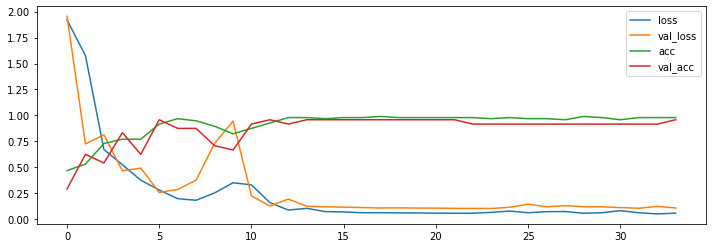

In [ ]:
import matplotlib.pyplot as plt

#학습 결과의 정확도와 손실도 시각화
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()
history

In [ ]:
#모델 평가
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 1.0000


[0.03353748098015785, 1.0]



---
# **CIFAR-10 분류**

---



In [ ]:
import tensorflow as tf

In [ ]:
from keras.datasets import cifar10

#cifar10 데이터 불러오기
#이미지 크기 32x32
#차원은 3차원
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

170500096/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
#이미지 전처리
x_train = x_train / 255.0
x_test = x_test / 255.0

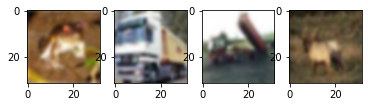

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(141)
plt.imshow(x_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[1], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[2], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[3], interpolation="bicubic")
plt.grid(False)

plt.show()

In [ ]:
import numpy as np

mean=[0,0,0]
std=[0,0,0]

x_train1 = np.ones(x_train.shape)
x_test1 = np.ones(x_test.shape)

#학습 데이터의 평균과 표준편차
for i in range(3):
    mean[i] = np.mean(x_train[:,:,:,i])
    std[i] = np.std(x_train[:,:,:,i])

#학습 데이터와 훈련 데이터 정규화
for i in range(3):
    x_train1[:,:,:,i] = x_train[:,:,:,i] - mean[i]
    x_train1[:,:,:,i] = x_train1[:,:,:,i] / std[i]
    x_test1[:,:,:,i] = x_test[:,:,:,i] - mean[i]
    x_test1[:,:,:,i] = x_test1[:,:,:,i] / std[i]

x_train = x_train1
x_test = x_test1

In [ ]:
from keras import models
from keras import layers

#모델 생성 입력은 32X32 컬러이므로 3채널, 컬러 이미지를 받기 위해 Conv2D 2층 과적합을 줄이기 위해 MaxPool2D 2층 Flatten으로 평탄화 Dense층 2층 Dropout 30프로, 출력 10개
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32,32,3), kernel_size=(3,3), filters=16),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])


#손실 함수 다중 분류 손실함수
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [ ]:
#검증 데이터로 20퍼센트 활용 훈련은 50번 진행
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4882 - accuracy: 0.4734 - val_loss: 1.1933 - val_accuracy: 0.5775
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1765 - accuracy: 0.5917 - val_loss: 1.0462 - val_accuracy: 0.6448
Epoch 3/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0650 - accuracy: 0.6296 - val_loss: 1.0281 - val_accuracy: 0.6505
Epoch 4/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9921 - accuracy: 0.6539 - val_loss: 1.0550 - val_accuracy: 0.6375
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9335 - accuracy: 0.6732 - val_loss: 1.0042 - val_accuracy: 0.6590
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8833 - accuracy: 0.6919 - val_loss: 0.9992 - val_accuracy: 0.6652
Epoch 7/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.8373 - accuracy: 0.7060 - val_loss: 1.0358 - val_accuracy:

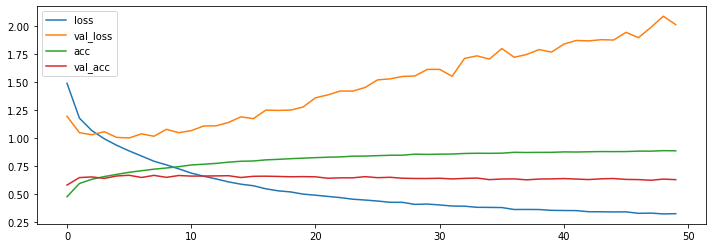

In [ ]:
import matplotlib.pyplot as plt

#학습 결과의 정확도와 손실도 시각화
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()
history

In [ ]:
#모델 평가
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.0384 - accuracy: 0.6277


[2.038433313369751, 0.6276999711990356]